<a href="https://colab.research.google.com/github/karllasouzza/Deep-Learning-Pytorch/blob/main/Arquitetura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from torchsummary import summary

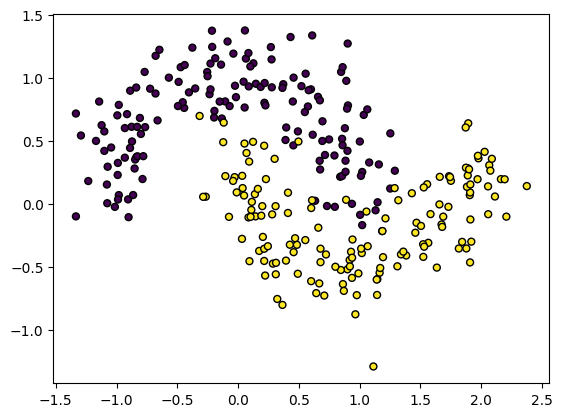

In [2]:
X1, Y1 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')

In [3]:
input_size = 2
hidden_size = 8
output_size = 1

In [4]:
net = nn.Sequential(nn.Linear(in_features= input_size, out_features=hidden_size), # hiden
                    nn.ReLU(), # ativação não linear
                    nn.Linear(in_features=hidden_size, out_features=output_size)) # output (saida)

print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


In [17]:
summary(net, input_size=(1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [5]:
# Forward

print(X1.shape)

tensor = torch.from_numpy(X1).float()
pred = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])


In [6]:
class MyNet(nn.Module):

  def __init__(self, input_size, hidden_size, output_size):
    super(MyNet, self).__init__()

    # Definir a arquitetura
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, x):

    # Gerar uma saida apartir do x
    hidden = self.relu(self.hidden(x))
    output = self.output(hidden)

    return output

In [7]:
net = MyNet(input_size, hidden_size, output_size)
print(net)

MyNet(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [8]:
# Forward

print(X1.shape)

tensor = torch.from_numpy(X1).float()
pred = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])


In [9]:
# GPU

if (torch.cuda.is_available()):
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

cuda


In [10]:
net = MyNet(input_size, hidden_size, output_size)
net = net.to(device)
print(net)

MyNet(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [12]:
# Forward

print(X1.shape)

tensor = torch.from_numpy(X1).float()
tensor = tensor.to(device)
# print(tensor)

pred = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])
